In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIOT2023 10%.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644785 entries, 0 to 4644784
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [4]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 1016288


In [5]:
print("Ukuran Dataset Sebelum Drop Duplikat:\n")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat:



(4644785, 47)

In [6]:
print("Ukuran Dataset Sesudah Drop Duplikat:\n")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:



(3628497, 47)

In [7]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [8]:
dataset.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,...,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06,3.628497e+06
mean,7.262128e+00,9.806340e+04,1.013753e+01,6.701270e+01,8.175986e+03,8.175986e+03,7.574012e-06,6.010092e-02,2.288151e-01,6.517850e-02,...,1.423634e+02,4.265004e+01,1.423641e+02,8.318577e+07,9.498648e+00,1.384745e+01,6.027363e+01,3.945128e+04,1.233856e-01,1.415170e+02
std,3.572646e+02,5.193580e+05,9.241353e+00,1.581392e+01,8.229015e+04,8.229015e+04,7.216875e-03,2.376738e-01,4.200700e-01,2.468406e-01,...,2.673509e+02,1.806643e+02,2.679248e+02,1.931526e+07,9.282701e-01,9.461443e+00,2.555251e+02,3.691113e+05,2.572401e-01,2.387379e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165152e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.199599e+00,2.199599e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.004340e+01,0.000000e+00,5.010000e+01,8.303769e+07,9.500000e+00,1.000397e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,1.471646e-02,7.180000e+01,6.000000e+00,6.400000e+01,1.893450e+01,1.893450e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.310670e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,2.321104e-01,1.375600e+04,1.684000e+01,6.400000e+01,8.567235e+02,8.567235e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.441405e+01,1.092828e+00,5.450000e+01,8.334421e+07,9.500000e+00,1.042953e+01,1.544983e+00,8.568570e+00,1.300000e-01,1.415500e+02
max,3.943572e+05,9.831137e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,1.336830e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.034054e+04,9.430300e+03,1.676394e+08,1.500000e+01,1.252094e+02,1.464463e+04,1.077896e+08,1.000000e+00,2.446000e+02


In [9]:
print("Jumlah Serangan Pada Dataset: \n")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset: 



Attack Type
DDoS              2450879
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64

In [10]:
label_map = {
    'BENIGN': 0,
    'DDoS': 1,
    'DoS': 2,
    'Mirai': 3,
    'Network Attack': 4,
    'Recon': 5,
    'Brute Force': 6,
    'Injection': 7,
    'Malware': 8,
}
dataset['Attack Type'] = dataset['Attack Type'].map(label_map)

In [11]:
dataset['Attack Type'].value_counts()

Attack Type
1    2450879
2     737933
3     242315
0     109198
4      53730
5      31732
6       1288
7       1114
8        308
Name: count, dtype: int64

In [12]:
X = dataset.drop('Attack Type',axis=1)
X = X.astype('float64')
y = dataset['Attack Type']

In [13]:
X.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
dtype: int64

In [14]:
y.isnull().sum()

0

In [15]:
# Bagi dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (2902797, 46)
y_train: (2902797,)
X_test: (725700, 46)
y_test: (725700,)


In [17]:
# Inisialisasi StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print("X_train:",X_train.shape)

print("X_test:",X_test.shape)


X_train: (2902797, 46)
X_test: (725700, 46)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

2025-06-17 08:57:48.612488: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 08:57:48.637827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 08:57:48.638685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-17 08:57:49.167490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 8 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-06-17 08:57:49.829412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-17 08:57:49.829728: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
90713/90713 [==============================] - 100s 1ms/step - loss: 0.1220 - accuracy: 0.9504 - val_loss: 0.0443 - val_accuracy: 0.9831
Epoch 2/5
90713/90713 [==============================] - 100s 1ms/step - loss: 0.0431 - accuracy: 0.9845 - val_loss: 0.0374 - val_accuracy: 0.9864
Epoch 3/5
90713/90713 [==============================] - 103s 1ms/step - loss: 0.0384 - accuracy: 0.9862 - val_loss: 0.0342 - val_accuracy: 0.9871
Epoch 4/5
90713/90713 [==============================] - 102s 1ms/step - loss: 0.0394 - accuracy: 0.9866 - val_loss: 0.0375 - val_accuracy: 0.9872
Epoch 5/5
22679/22679 [==============================] - 23s 1ms/step - loss: 0.0349 - accuracy: 0.9873
Test Loss: 0.03488526493310928
Test Accuracy: 0.9872881174087524
22679/22679 [==============================] - 15s 668us/step
Confusion Matrix:
[[ 20354      1      0      0    605   1100      0      0      0]
 [    93 489320    118     23    135      3      0      0      0]
 [   146    443 147171      1  

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86     22060
           1       1.00      1.00      1.00    489692
           2       1.00      1.00      1.00    147768
           3       1.00      1.00      1.00     48629
           4       0.81      0.67      0.73     10779
           5       0.65      0.62      0.63      6212
           6       0.00      0.00      0.00       264
           7       0.00      0.00      0.00       232
           8       0.00      0.00      0.00        64

    accuracy                           0.99    725700
   macro avg       0.59      0.58      0.58    725700
weighted avg       0.99      0.99      0.99    725700



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


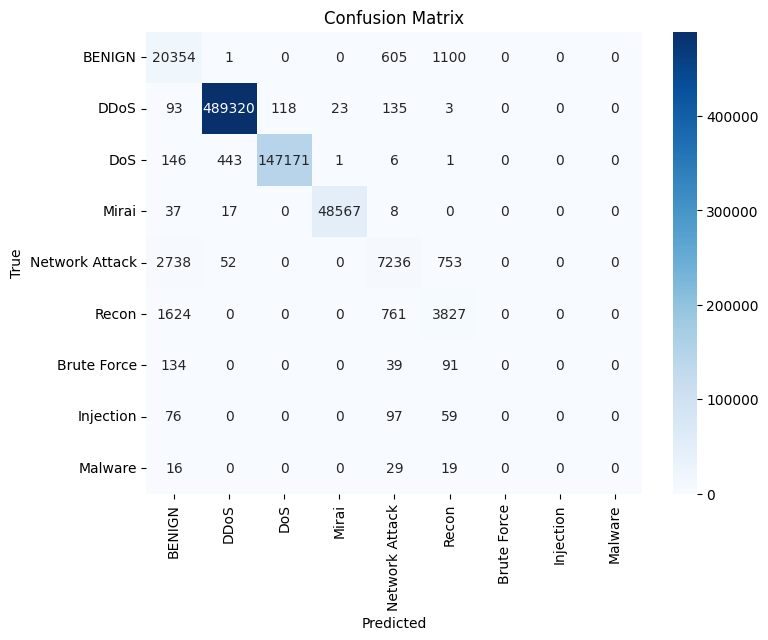

In [21]:
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


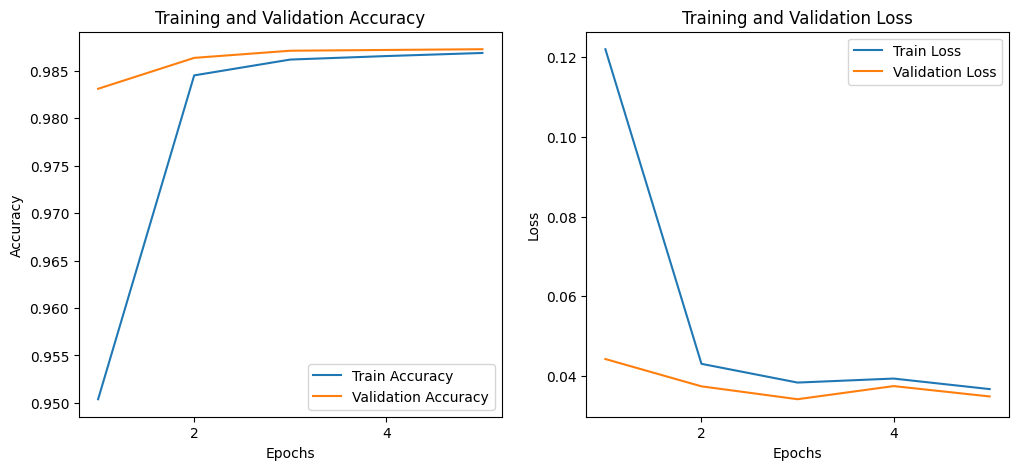

In [22]:
import matplotlib.pyplot as plt

# Ambil jumlah total epoch dari history
total_epochs = len(history.history['accuracy'])

# Pastikan jumlah epoch mencapai 20
epochs_range = range(1, total_epochs + 1)

# Plot Akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(2, total_epochs + 1, 2))  # Menampilkan setiap 2 epoch mulai dari 2
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks(range(2, total_epochs + 1, 2))  # Menampilkan setiap 2 epoch mulai dari 2
plt.legend()

plt.show()